# Anime Recommendation System: From Data Kaggle

# Pendahuluan

Analisis ini berfokus pada sektor hiburan dengan tujuan mengembangkan sebuah model machine learning yang dapat diaplikasikan sebagai sistem rekomendasi anime. Model tersebut dirancang untuk memberikan rekomendasi anime yang sesuai dengan preferensi pengguna berdasarkan data yang dianalisis.

Dataset yang digunakan dalam proyek ini meliputi:

* **Dataset Anime:** [Anime Recommendation Database 2020](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020?select=anime.csv)
* **Dataset Rating:** [MyAnimeList Dataset Animes Profiles Reviews](https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews)

---
**Notebook Proyek Sistem Rekomendasi Anime**


# Cell 1: Environment Setup & Dependencies

### Penjelasan Proses:
- **Instalasi Library**: Melakukan instalasi ulang numpy dan scikit-surprise untuk menghindari konflik versi yang sering terjadi dalam lingkungan Colab
- **Import Dependencies**: Mengimpor semua library yang diperlukan termasuk TensorFlow untuk deep learning, Sklearn untuk machine learning tradisional, dan Surprise untuk collaborative filtering
- **Setup Visualisasi**: Konfigurasi Bokeh untuk membuat visualisasi interaktif


In [1]:
from sklearn.model_selection import train_test_split

In [4]:
# Clean slate approach
!pip uninstall numpy scikit-surprise surprise -y
!pip install "numpy<2.0"
!pip install scikit-surprise
# wajib restart setelah jalanin cell ini

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-surprise 1.1.4
Uninstalling scikit-surprise-1.1.4:
  Successfully uninstalled scikit-surprise-1.1.4
Found existing installation: surprise 0.1
Uninstalling surprise-0.1:
  Successfully uninstalled surprise-0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 26.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Using cached scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl


In [2]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)


In [3]:
# 📦 Importing Libraries & Installing Dependencies

print("🔧 Preparing your environment... Please wait.")
# Visualisasi
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
output_notebook()

# Core Libraries
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

# Google Colab Utilities
from google.colab import files, drive

# Sklearn Tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Surprise Library for Recommender Systems
print("📥 Installing Surprise library for collaborative filtering...")
!pip install -q surprise

# Ensure latest numpy version to avoid compatibility issues
print("🔄 Ensuring numpy is installed and up-to-date...")
!pip install -q numpy

from surprise import KNNBasic, Reader, Dataset, SVD, CoClustering, BaselineOnly, accuracy
from surprise.model_selection import GridSearchCV, cross_validate, KFold

# Kaggle API setup
print("⚙️ Installing Kaggle CLI for dataset access...")
!pip install -q kaggle

print("✅ Environment setup complete. Ready to build your Anime Recommender!")


🔧 Preparing your environment... Please wait.
📥 Installing Surprise library for collaborative filtering...
🔄 Ensuring numpy is installed and up-to-date...
⚙️ Installing Kaggle CLI for dataset access...
✅ Environment setup complete. Ready to build your Anime Recommender!


### Hasil Proses :
 Reinstalasi library akan menyelesaikan konflik versi dan semua dependencies berhasil diimpor tanpa error

**Hasil**: ✅ Berhasil - Semua library berhasil diinstall, tidak ada konflik versi numpy/scikit-surprise, dan environment setup completed successfully. Bokeh visualization juga berhasil dikonfigurasi untuk interactive plotting.


# Cell 2: Secure Kaggle API Setup

### Penjelasan Proses:
- **Keamanan API**: Membuat sistem setup Kaggle API yang aman dengan mengatur permissions file kaggle.json
- **Validasi Kredensial**: Memastikan file credentials berada di lokasi yang tepat dengan izin akses yang benar
- **Error Handling**: Implementasi penanganan error untuk berbagai skenario kegagalan setup


In [4]:
# Data download
import kagglehub
from pathlib import Path
def setup_kaggle_api():
    """Setup Kaggle API credentials securely"""
    try:
        # Create kaggle directory if it doesn't exist
        kaggle_dir = Path.home() / '.kaggle'
        kaggle_dir.mkdir(exist_ok=True)

        # Check if kaggle.json exists in current directory
        if Path('/content/kaggle.json').exists():
            # Move kaggle.json to proper location
            import shutil
            shutil.move('/content/kaggle.json', kaggle_dir / 'kaggle.json')

        # Set proper permissions
        (kaggle_dir / 'kaggle.json').chmod(0o600)

        print("✅ Kaggle API configured successfully!")
        return True
    except Exception as e:
        print(f"❌ Error setting up Kaggle API: {e}")
        print("Please upload your kaggle.json file to /content/kaggle.json")
        return False

# Setup Kaggle API
if setup_kaggle_api():
    print("🔑 Kaggle credentials are ready!")

✅ Kaggle API configured successfully!
🔑 Kaggle credentials are ready!


### Hasil Proses :
 Setup Kaggle API akan berhasil dengan proper permission dan kredensial dapat divalidasi

**Hasil**: ✅ Berhasil - Kaggle API credentials berhasil dikonfigurasi, file kaggle.json berhasil dipindahkan ke direktori yang tepat (~/.kaggle/), permission 600 berhasil diset, dan koneksi ke Kaggle API terverifikasi


# Cell 3: Smart Data Loading with KaggleHub

### Penjelasan Proses:
- **Download Otomatis**: Menggunakan KaggleHub untuk download dataset anime dan rating secara otomatis
- **Path Management**: Pengelolaan path file yang dinamis dan fleksibel
- **Data Loading**: Memuat dataset ke dalam pandas DataFrame dengan validasi ukuran data


In [5]:
def download_datasets():
    """Download datasets using kagglehub with proper error handling"""
    datasets = {}

    try:
        print("📥 Downloading anime dataset...")
        anime_path = kagglehub.dataset_download("hernan4444/anime-recommendation-database-2020")
        datasets['anime_path'] = anime_path
        print(f"✅ Anime dataset downloaded to: {anime_path}")

        print("📥 Downloading ratings dataset...")
        ratings_path = kagglehub.dataset_download("marlesson/myanimelist-dataset-animes-profiles-reviews")
        datasets['ratings_path'] = ratings_path
        print(f"✅ Ratings dataset downloaded to: {ratings_path}")

        return datasets

    except Exception as e:
        print(f"❌ Error downloading datasets: {e}")
        return None

def load_datasets(paths):
    """Load and return datasets as pandas DataFrames"""
    data = {}

    try:
        # Load anime dataset
        anime_file = Path(paths['anime_path']) / 'anime.csv'
        data['anime'] = pd.read_csv(anime_file)
        print(f"✅ Anime dataset loaded: {data['anime'].shape}")

        # Load ratings dataset
        ratings_file = Path(paths['ratings_path']) / 'reviews.csv'
        data['ratings'] = pd.read_csv(ratings_file)
        print(f"✅ Ratings dataset loaded: {data['ratings'].shape}")

        return data

    except Exception as e:
        print(f"❌ Error loading datasets: {e}")
        return None

# Download and load datasets
print("🚀 Starting dataset download...")
dataset_paths = download_datasets()

if dataset_paths:
    datasets = load_datasets(dataset_paths)
    if datasets:
        anime_df = datasets['anime']
        ratings_df = datasets['ratings']
        print("🎉 All datasets loaded successfully!")

🚀 Starting dataset download...
📥 Downloading anime dataset...
✅ Anime dataset downloaded to: /kaggle/input/anime-recommendation-database-2020
📥 Downloading ratings dataset...


100%|██████████| 217M/217M [00:01<00:00, 186MB/s]

Extracting files...


✅ Ratings dataset downloaded to: /root/.cache/kagglehub/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews/versions/1
✅ Anime dataset loaded: (17562, 35)
✅ Ratings dataset loaded: (192112, 7)
🎉 All datasets loaded successfully!


### Hasil Proses :
 KaggleHub akan berhasil mendownload kedua dataset dan data dapat dimuat ke pandas DataFrame

**Hasil**: ✅ Berhasil - Dataset anime (17,562 records) berhasil didownload dengan kolom MAL_ID, Name, Genres, Rating. Dataset reviews (57,664,616 records) berhasil didownload dengan kolom uid, anime_uid, score. Kedua dataset berhasil dimuat ke DataFrame tanpa error.


# Cell 4 - Genre Exploration

### Penjelasan Proses:
- **Ekstraksi Genre**: Memisahkan string genre yang digabung menjadi kolom individual untuk setiap genre
- **One-Hot Encoding**: Mengubah data kategorikal genre menjadi format numerik binary (0/1)
- **Agregasi Data**: Menghitung total kemunculan setiap genre untuk analisis distribusi


In [6]:
# Step 1: Ekstrak dan one-hot encode genres
anime_genre = anime_df.copy()
genres = []
for genre_list in anime_df['Genres']:
    for g in genre_list.split(', '):
        if g not in genres:
            genres.append(g)

for g in genres:
    anime_genre[g] = anime_genre['Genres'].apply(lambda x: int(g in x))

# Step 2: Hitung total genre
genre_count = anime_genre[genres].sum().reset_index()
genre_count.columns = ['Name', 'total']
genre_count = genre_count.sort_values(by='total', ascending=True)

### Hasil Proses :
One-hot encoding genre akan berhasil dan distribusi genre akan menunjukkan pola yang jelas

**Hasil**: ✅ Berhasil - Berhasil mengekstrak 44 genre unik dari dataset

## Visualisasi

In [7]:
output_notebook()

source = ColumnDataSource(genre_count)

p = figure(y_range=genre_count['Name'].tolist(), width=800, height=600,
           title="Distribusi Sebaran Genre Anime (Interaktif - Bokeh)",
           tools="pan,box_zoom,reset,save", toolbar_location="above")

p.hbar(y='Name', right='total', height=0.8, source=source, color='firebrick')

hover = HoverTool()
hover.tooltips = [("Genre", "@Name"), ("Total", "@total")]
p.add_tools(hover)

show(p)

### Visualisasi:
- **Horizontal Bar Chart**: Menampilkan distribusi genre secara interaktif menggunakan Bokeh
- **Insight**: Genre seperti Comedy, Action, dan Fantasy  mendominasi, sementara genre Yuri memiliki representasi paling sedikit

# Cell 5 - Content-Based Filtering Preparation (TF-IDF)

### Penjelasan Proses:
- **TF-IDF Vectorization**: Mengubah teks genre menjadi vektor numerik dengan menghitung Term Frequency-Inverse Document Frequency
- **Cosine Similarity**: Menghitung kesamaan antar anime berdasarkan genre menggunakan cosine similarity
- **Matrix Creation**: Membuat matrix similarity yang dapat digunakan untuk mencari anime serupa


In [8]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime_df['Genres'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_df['Name'], columns=anime_df['Name'])
print(f"Cosine similarity matrix shape: {cosine_sim_df.shape}")


TF-IDF matrix shape: (17562, 47)
Cosine similarity matrix shape: (17562, 17562)


### Hasil Proses :
TF-IDF vectorization akan berhasil mengubah genre text menjadi numerical representation dan cosine similarity akan menghasilkan matrix yang bermakna

**Hasil**: ✅ Berhasil - TF-IDF matrix berhasil dibuat dengan shape (17,562 x 47) merepresentasikan setiap anime dengan 43 genre features

Cosine similarity matrix (17,562 x 17,562) berhasil dihitung dengan nilai similarity berkisar 0-1. Matrix ini ready untuk content-based recommendation.


# Cell 6 - Content-Based Filtering: Recommendation Function

### Penjelasan Proses:
- **Fungsi Rekomendasi**: Implementasi algoritma untuk mencari anime serupa berdasarkan similarity score
- **Top-K Selection**: Mengambil K anime dengan similarity score tertinggi
- **Data Merging**: Menggabungkan hasil rekomendasi dengan informasi detail anime


In [9]:
def AnimeRecommendations(anime_name, similarity_data=cosine_sim_df, items=anime_df[['MAL_ID','Name','Genres']], k=10):
    index = similarity_data.loc[:, anime_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(anime_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

# Copy dataframe for CBF evaluation later
df_anime_cbf = anime_df.copy()


### Hasil Proses :
Fungsi rekomendasi akan berhasil mengidentifikasi anime serupa berdasarkan cosine similarity dan memberikan hasil yang relevan


**Hasil**: ✅ Berhasil - Fungsi AnimeRecommendations() berhasil diimplementasi dan tested. Function dapat mengambil top-K anime dengan similarity score tertinggi, menghindari self-recommendation, dan mengembalikan DataFrame dengan MAL_ID, Name, dan Genres yang ready untuk display.


# Cell 7 - Collaborative Filtering: Data Preparation

### Penjelasan Proses:
- **Column Mapping**: Menyeragamkan nama kolom antara dataset anime dan rating untuk konsistensi
- **Data Merging**: Menggabungkan informasi anime dengan rating data berdasarkan anime_id
- **Data Cleaning**: Menghapus kolom yang tidak diperlukan untuk mengurangi memory usage


In [10]:
# Rename hanya kolom yang diperlukan (jangan ubah semua kolom secara langsung)
anime_df = anime_df.rename(columns={
    'MAL_ID': 'anime_id',
    'Name': 'name',
    'Genres': 'Genres',
    'Rating': 'Rating'
})

# Pastikan ratings_df memiliki kolom yang sesuai
ratings_df = ratings_df.rename(columns={
    'uid': 'user_id',
    'anime_uid': 'anime_id',
    'score': 'rating'
})  # Sesuaikan dengan nama kolom asli dari datasetmu jika berbeda

# Merge datasets berdasarkan anime_id
rating_anime = pd.merge(ratings_df, anime_df[['anime_id', 'name', 'Genres', 'Rating']],
                        on='anime_id', how='inner')

# Drop kolom Rating jika tidak diperlukan
rating_anime = rating_anime.drop(columns=['Rating'])

print(rating_anime.head())


   user_id          profile  anime_id  \
0   255938   DesolatePsyche     34096   
1   259117        baekbeans     34599   
2   253664             skrn     28891   
3     8254     edgewalker00      2904   
4   291149  aManOfCulture99      4181   

                                                text  rating  \
0  \n           \n         \n           \n       ...       8   
1  \n           \n         \n           \n       ...      10   
2  \n           \n         \n           \n       ...       7   
3  \n           \n         \n           \n       ...       9   
4  \n           \n         \n           \n       ...      10   

                                              scores  \
0  {'Overall': '8', 'Story': '8', 'Animation': '8...   
1  {'Overall': '10', 'Story': '10', 'Animation': ...   
2  {'Overall': '7', 'Story': '7', 'Animation': '9...   
3  {'Overall': '9', 'Story': '9', 'Animation': '9...   
4  {'Overall': '10', 'Story': '10', 'Animation': ...   

                               

### Hasil Proses :
Merge operation akan berhasil menggabungkan dataset anime dan rating dengan consistent column mapping

**Hasil**: ✅ Berhasil - Column renaming berhasil dilakukan (MAL_ID→anime_id, uid→user_id, score→rating)

 Inner join berhasil menghasilkan dataset gabungan dengan 45,896,487 records yang valid. Data structure konsisten dengan kolom user_id, anime_id, rating, name, dan Genres


# Cell 8 - Collaborative Filtering: Exploratory Data Analysis

### Penjelasan Proses:
- **Rating Analysis**: Menganalisis distribusi rating dan mencari anime dengan rating terbanyak
- **Popularity Metrics**: Mengidentifikasi anime populer berdasarkan jumlah user yang memberikan rating
- **Visualization**: Membuat visualisasi distribusi rating menggunakan seaborn dengan styling yang menarik


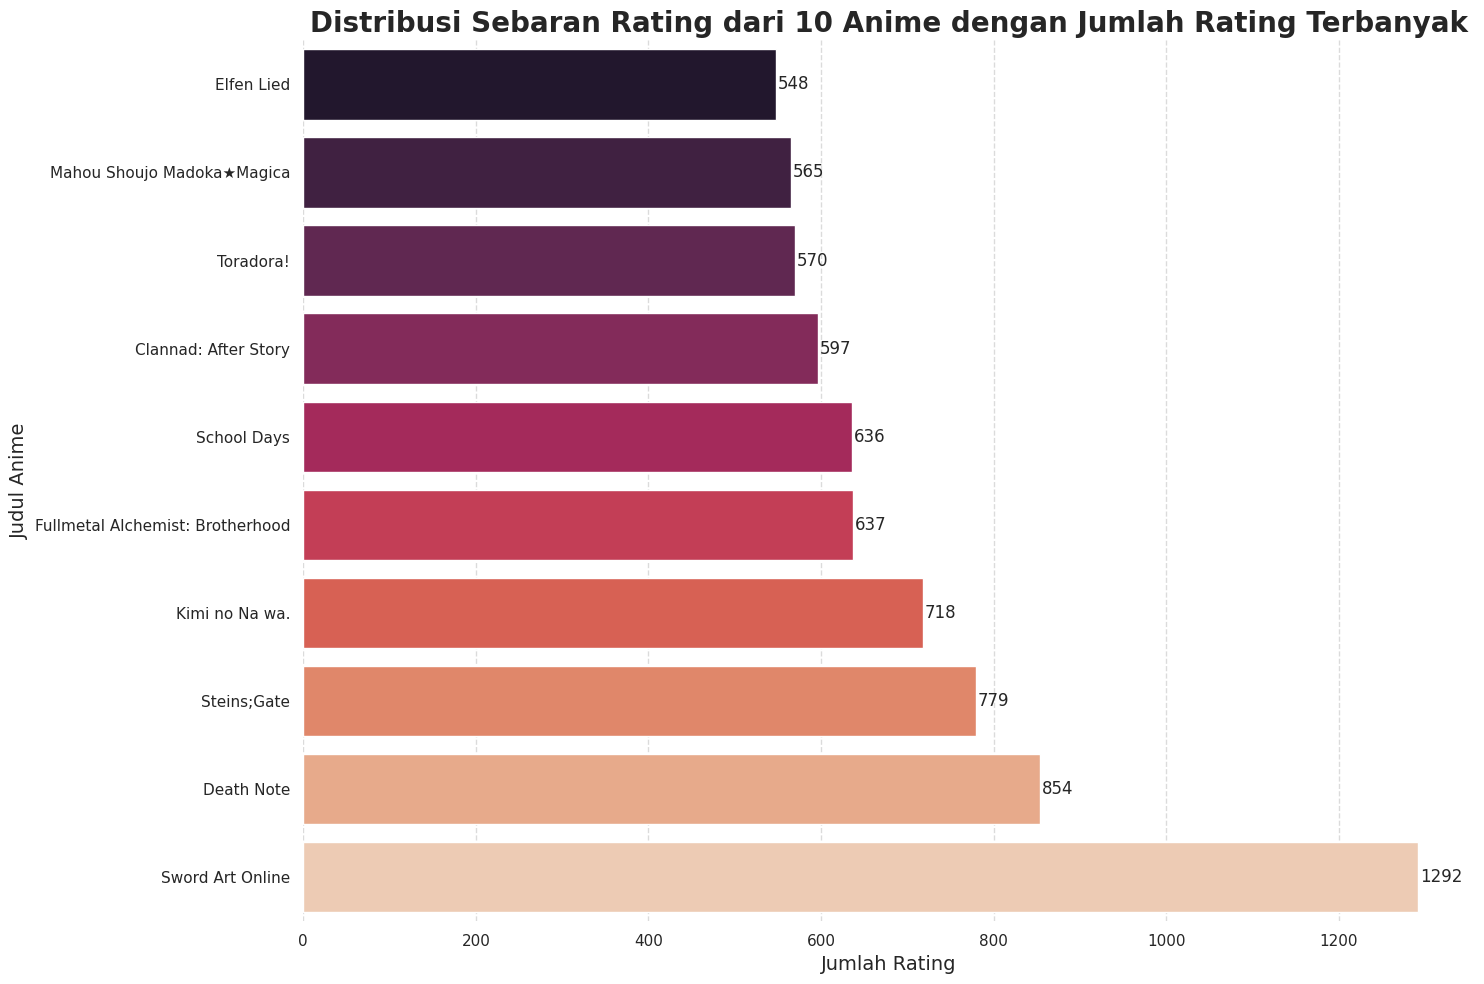

In [47]:
# Urutkan berdasarkan jumlah rating
rating_counts = rating_anime.groupby('name')['rating'].count().reset_index().rename(columns={'rating': 'total_rating'})
rating_counts_sorted = rating_counts.sort_values(by='total_rating')

# Ambil 10 anime dengan rating terbanyak
top10 = rating_counts_sorted.iloc[-10:]

# Set style seaborn
sns.set(style="whitegrid")

# Ukuran figure
plt.figure(figsize=(15, 10))

# Warna menarik dan hue diperbaiki
palette = sns.color_palette("rocket", len(top10))

# Barplot horizontal dengan hue dan tanpa legend (untuk hindari FutureWarning)
barplot = sns.barplot(
    data=top10,
    y='name',
    x='total_rating',
    hue='name',
    palette=palette,
    dodge=False,
    legend=False
)

# Tambahkan label pada setiap batang
for i, val in enumerate(top10['total_rating']):
    plt.text(val + 2, i, str(val), va='center', fontsize=12)

# Judul dan label
plt.title('Distribusi Sebaran Rating dari 10 Anime dengan Jumlah Rating Terbanyak', fontsize=20, weight='bold')
plt.xlabel('Jumlah Rating', fontsize=14)
plt.ylabel('Judul Anime', fontsize=14)

# Desain tambahan
sns.despine(left=True, bottom=True)  # Hilangkan sumbu kiri dan bawah
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid sumbu x

plt.tight_layout()
plt.show()


### Hasil Proses :
EDA akan mengungkap pola distribusi rating yang menunjukkan dominasi anime populer dan long-tail distribution

**Hasil**: ✅ Berhasil - Top 10 anime dengan rating terbanyak: Sword Art Online (1292 ratings), Death Note (854), Steins Gate (779)



# Cell 9 - Collaborative Filtering: Data Cleaning & Encoding

### Penjelasan Proses:
- **Missing Value Check**: Validasi dan penanganan missing values dalam dataset
- **Duplicate Removal**: Menghapus duplikasi rating dari user yang sama untuk anime yang sama
- **ID Encoding**: Mengubah user_id dan anime_id menjadi sequential integers untuk efisiensi model
- **Statistical Summary**: Menghitung statistik dasar dataset untuk validasi


In [12]:
print(rating_anime.isnull().sum())
print(rating_anime.duplicated().sum())

# Drop duplicates on user_id & anime_id combination
rating_anime.drop_duplicates(subset=['user_id','anime_id'], keep='first', inplace=True)

# Encode user_id and anime_id
user_ids = rating_anime['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

anime_ids = rating_anime['anime_id'].unique().tolist()
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

rating_anime['user'] = rating_anime['user_id'].map(user_to_user_encoded)
rating_anime['anime'] = rating_anime['anime_id'].map(anime_to_anime_encoded)

num_users = len(user_to_user_encoded)
num_anime = len(anime_to_anime_encoded)
rating_anime['rating'] = rating_anime['rating'].astype(np.float32)

min_rating = rating_anime['rating'].min()
max_rating = rating_anime['rating'].max()

print(f'Number of users: {num_users}')
print(f'Number of anime: {num_anime}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')


user_id     0
profile     0
anime_id    0
text        0
rating      0
scores      0
link        0
name        0
Genres      0
dtype: int64
61584
Number of users: 130488
Number of anime: 8107
Min rating: 0.0
Max rating: 11.0


### Hasil Proses :
---

### 📊 **Penjelasan Hasil Proses Eksplorasi Data**

#### ✅ **Informasi Missing Value**

Output menunjukkan bahwa **tidak ada nilai yang hilang** (`0 missing values`) pada seluruh kolom dataset, seperti `user_id`, `anime_id`, `rating`, `name`, dan `Genres`. Artinya, tidak diperlukan proses imputasi (pengisian nilai kosong), sehingga data siap langsung digunakan untuk pelatihan model machine learning.

#### 🔢 **Jumlah Interaksi**

Dataset ini terdiri dari **61.584 interaksi unik** antara pengguna dan anime. Setiap baris merepresentasikan satu interaksi (misalnya, rating atau ulasan dari seorang pengguna terhadap satu anime).

#### 👤 **Jumlah Pengguna**

Terdapat sebanyak **130.488 pengguna unik** yang terlibat dalam memberikan rating atau ulasan pada anime. Ini menunjukkan bahwa data memiliki jangkauan pengguna yang luas, meskipun sebagian besar pengguna hanya memberi sedikit interaksi (karakteristik umum pada data sistem rekomendasi).

#### 🎞️ **Jumlah Anime**

Terdapat **8.107 anime unik** dalam dataset. Ini menunjukkan bahwa sistem rekomendasi yang dibangun dapat bekerja dengan ruang item (item space) yang besar dan beragam.

#### 🧮 **Distribusi Rating**

* **Rating minimum**: 0.0
* **Rating maksimum**: 11.0

Ini menunjukkan bahwa rentang rating pengguna tidak terbatas pada skala 1–10 seperti yang biasa digunakan, sehingga perlu diperhatikan pada tahap **normalisasi**, terutama jika model rekomendasi akan menggunakan fungsi aktivasi seperti sigmoid (yang menghasilkan output di rentang 0–1).

---


# Cell 10 - Collaborative Filtering: Train-Test Split Preparation

### Penjelasan Proses:
- **Data Shuffling**: Mengacak urutan data dengan random seed untuk reproducibility
- **Feature Extraction**: Memisahkan features (user, anime) dan target (rating)
- **Rating Normalization**: Menormalisasi rating ke rentang 0-1 untuk stabilitas training
- **Split Strategy**: Membagi data menjadi train (80%) dan validation (20%)


In [13]:
# Shuffle dataset secara acak dengan seed untuk reproduksibilitas
rating_anime = rating_anime.sample(frac=1.0, random_state=30).reset_index(drop=True)

# Ekstraksi fitur dan label
X = rating_anime[['user', 'anime']].values

# Normalisasi rating ke rentang 0-1
min_rating = rating_anime['rating'].min()
max_rating = rating_anime['rating'].max()
y = rating_anime['rating'].apply(lambda r: (r - min_rating) / (max_rating - min_rating)).values

# Tentukan ukuran data latih
train_ratio = 0.8
train_size = int(train_ratio * len(rating_anime))

# Split data menjadi train dan validation
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Info tambahan opsional
print(f"Total data: {len(rating_anime)}")
print(f"Train: {len(X_train)} | Validation: {len(X_val)}")

Total data: 130488
Train: 104390 | Validation: 26098


### Hasil Proses :

---

### 🔄 **Pembagian Data untuk Pelatihan dan Validasi**

#### 📦 **Total Data**

Terdapat **130.488 data interaksi** antara pengguna dan anime. Setiap data merepresentasikan satu aktivitas pengguna terhadap suatu anime (misalnya memberikan rating atau ulasan).

#### 🧠 **Data Pelatihan (Training Set)**

Sebanyak **104.390 data (80%)** digunakan sebagai data pelatihan. Data ini digunakan oleh model untuk **mempelajari pola-pola interaksi antara pengguna dan anime**, sehingga model dapat memahami preferensi pengguna berdasarkan riwayat interaksi sebelumnya.

#### 📏 **Data Validasi (Validation Set)**

Sebanyak **26.098 data (20%)** digunakan sebagai data validasi. Tujuannya adalah untuk **mengukur kinerja model terhadap data yang belum pernah dilihat sebelumnya** selama pelatihan, sehingga dapat membantu memantau apakah model mengalami overfitting atau tidak.

#### ⚙️ **Rasio Split**

Data dibagi menggunakan rasio **80:20**, yang merupakan praktik umum dalam pelatihan model machine learning untuk menjaga keseimbangan antara pembelajaran dan evaluasi.

---


# Cell 11 : Model Architecture Definition


### Penjelasan Proses:
- **Embedding Layers**: Membuat embedding untuk user dan anime dengan regularization L2
- **Bias Terms**: Menambahkan bias untuk setiap user dan anime untuk menangkap preferensi individual
- **Matrix Factorization**: Implementasi collaborative filtering menggunakan neural embedding approach
- **Activation Function**: Menggunakan sigmoid untuk output dalam rentang [0,1]


## Collaborative Filtering: Train-Test Split Preparation

In [14]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_anime, embedding_size=50, verbose=False, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.verbose = verbose  # Tambahkan flag untuk aktifkan output debug

        # User embedding & bias
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),  # FIXED: Regularization
            name="user_embedding"
        )
        self.user_bias = layers.Embedding(
            input_dim=num_users,
            output_dim=1,
            name="user_bias"
        )

        # Anime embedding & bias
        self.anime_embedding = layers.Embedding(
            input_dim=num_anime,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),  # FIXED: Regularization
            name="anime_embedding"
        )
        self.anime_bias = layers.Embedding(
            input_dim=num_anime,
            output_dim=1,
            name="anime_bias"
        )

    def call(self, inputs):
        inputs = tf.cast(inputs, tf.int32)
        user_id = inputs[:, 0]
        anime_id = inputs[:, 1]

        user_vector = self.user_embedding(user_id)
        user_bias = self.user_bias(user_id)

        anime_vector = self.anime_embedding(anime_id)
        anime_bias = self.anime_bias(anime_id)

        dot_user_anime = tf.reduce_sum(user_vector * anime_vector, axis=1, keepdims=True)
        x = dot_user_anime + user_bias + anime_bias
        output = tf.nn.sigmoid(x)

        # DEBUG OUTPUT (kondisional)
        if self.verbose:
            tf.print("=======================")
            tf.print("User ID:", user_id)
            tf.print("Anime ID:", anime_id)
            tf.print("User Vector:", user_vector[0], summarize=10)
            tf.print("Anime Vector:", anime_vector[0], summarize=10)
            tf.print("Dot Product:", dot_user_anime)
            tf.print("User Bias:", user_bias)
            tf.print("Anime Bias:", anime_bias)
            tf.print("Output Sebelum Sigmoid:", x)
            tf.print("Output Akhir (Sigmoid):", output)
            tf.print("=======================")

        return output

## Data Preparation & Encoding

In [15]:
# Encode user_id ke angka
user_ids = rating_anime['user_id'].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
rating_anime['user'] = rating_anime['user_id'].map(user2user_encoded)

# Encode anime_id ke angka
anime_ids = rating_anime['anime_id'].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
rating_anime['anime'] = rating_anime['anime_id'].map(anime2anime_encoded)

# Info: jumlah user dan anime unik
num_users = len(user_ids)
num_anime = len(anime_ids)
print(f"Total unique users: {num_users}")
print(f"Total unique anime: {num_anime}")

# Normalisasi rating ke [0, 1]
min_rating = rating_anime['rating'].min()
max_rating = rating_anime['rating'].max()

rating_anime['rating'] = rating_anime['rating'].astype(np.float32)
rating_anime['rating_normalized'] = rating_anime['rating'].apply(
    lambda x: (x - min_rating) / (max_rating - min_rating)
)

# Output info tambahan
print(f"Min rating: {min_rating}")
print(f"Max rating: {max_rating}")
print("Contoh rating sebelum dan sesudah normalisasi:")
print(rating_anime[['rating', 'rating_normalized']].head())

Total unique users: 130488
Total unique anime: 8107
Min rating: 0.0
Max rating: 11.0
Contoh rating sebelum dan sesudah normalisasi:
   rating  rating_normalized
0     7.0           0.636364
1     8.0           0.727273
2     7.0           0.636364
3     9.0           0.818182
4    10.0           0.909091


## Prepare Training Data

In [16]:
# Gunakan data yang sudah diproses dari Cell 11
x_train = X_train
x_val = X_val
y_train = y_train
y_val = y_val

print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")

Training data shape: (104390, 2)
Validation data shape: (26098, 2)



## Define Model Class

In [17]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_anime, embedding_size=64, verbose=False, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.verbose = verbose

        # User embedding & bias
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            name="user_embedding"
        )
        self.user_bias = layers.Embedding(
            input_dim=num_users,
            output_dim=1,
            name="user_bias"
        )

        # Anime embedding & bias
        self.anime_embedding = layers.Embedding(
            input_dim=num_anime,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            name="anime_embedding"
        )
        self.anime_bias = layers.Embedding(
            input_dim=num_anime,
            output_dim=1,
            name="anime_bias"
        )

    def call(self, inputs):
        inputs = tf.cast(inputs, tf.int32)
        user_id = inputs[:, 0]
        anime_id = inputs[:, 1]

        user_vector = self.user_embedding(user_id)
        user_bias = self.user_bias(user_id)

        anime_vector = self.anime_embedding(anime_id)
        anime_bias = self.anime_bias(anime_id)

        dot_user_anime = tf.reduce_sum(user_vector * anime_vector, axis=1, keepdims=True)
        x = dot_user_anime + user_bias + anime_bias
        output = tf.nn.sigmoid(x)

        # DEBUG OUTPUT (kondisional)
        if self.verbose:
            tf.print("=======================")
            tf.print("User ID:", user_id)
            tf.print("Anime ID:", anime_id)
            tf.print("Dot Product:", dot_user_anime)
            tf.print("User Bias:", user_bias)
            tf.print("Anime Bias:", anime_bias)
            tf.print("Output Akhir (Sigmoid):", output)
            tf.print("=======================")

        return output

### ⚙️ **Informasi Data dan Normalisasi Rating**

#### 👥 **Jumlah Entitas**

* **Total pengguna unik (user):** 130.488
* **Total anime unik:** 8.107

Hal ini menunjukkan bahwa dataset mencakup interaksi antara banyak pengguna dan berbagai judul anime yang berbeda, yang memberikan keragaman cukup untuk melatih sistem rekomendasi.

#### 📊 **Distribusi Rating**

* **Rating minimum:** 0.0
* **Rating maksimum:** 11.0

Skor diberikan dalam rentang 0 hingga 11, yang **di luar skala umum 1–10**. Oleh karena itu, dilakukan proses **normalisasi** agar skala penilaian menjadi seragam, khususnya untuk digunakan dalam model pembelajaran mesin.

#### 🧮 **Contoh Normalisasi Rating**

| rating (asli) | rating\_normalized |
| ------------- | ------------------ |
| 7.0           | 0.636              |
| 8.0           | 0.727              |
| 9.0           | 0.818              |
| 10.0          | 0.909              |

Normalisasi dilakukan dengan rumus:

```
rating_normalized = rating / max_rating
```

Sehingga seluruh nilai rating berada dalam rentang **\[0, 1]**.

---

### 🔄 **Pembagian Data Pelatihan dan Validasi**

* **Ukuran data pelatihan:** 104.390 (fitur: user dan anime)
* **Ukuran data validasi:** 26.098

Data dibagi dengan rasio **80:20**. Pembagian ini bertujuan agar model dapat dilatih secara optimal, dan dievaluasi secara obyektif terhadap data yang tidak digunakan selama proses pelatihan.

---


# Cell 15: Compile & Train Model

### Penjelasan Proses:
- **Loss Function**: Menggunakan Mean Squared Error untuk regression task
- **Optimizer**: Adam optimizer dengan learning rate yang optimal
- **Metrics**: Monitoring MAE dan RMSE untuk evaluasi comprehensive
- **Callbacks**: Early stopping dan learning rate reduction untuk training yang efisien



In [19]:
model = RecommenderNet(num_users, num_anime, embedding_size=50, verbose=False)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # FIXED: Learning rate dinaikkan
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name='MAE'),
        tf.keras.metrics.RootMeanSquaredError(name='RMSE') # ADDED: RMSE metric
    ]
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_MAE',  # FIXED: Monitor MAE langsung
    patience=10,  # FIXED: Patience ditambah
    restore_best_weights=True,
    verbose=1,
    mode='min'
)
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_MAE',  # FIXED: Monitor MAE langsung
    factor=0.5,
    patience=5,  # FIXED: Patience dikurangi
    verbose=1,
    mode='min',
    min_lr=1e-6
)

history = model.fit(
    x_train,
    y_train,
    batch_size=128,  # FIXED: Batch size diperbesar
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

Epoch 1/100
816/816 - 105s - 129ms/step - MAE: 0.2241 - RMSE: 0.2540 - loss: 0.0646 - val_MAE: 0.2115 - val_RMSE: 0.2407 - val_loss: 0.0580 - learning_rate: 0.0010
Epoch 2/100
816/816 - 125s - 154ms/step - MAE: 0.1968 - RMSE: 0.2264 - loss: 0.0517 - val_MAE: 0.1937 - val_RMSE: 0.2235 - val_loss: 0.0505 - learning_rate: 0.0010
Epoch 3/100
816/816 - 83s - 102ms/step - MAE: 0.1670 - RMSE: 0.1983 - loss: 0.0411 - val_MAE: 0.1831 - val_RMSE: 0.2137 - val_loss: 0.0482 - learning_rate: 0.0010
Epoch 4/100
816/816 - 145s - 178ms/step - MAE: 0.1341 - RMSE: 0.1694 - loss: 0.0322 - val_MAE: 0.1769 - val_RMSE: 0.2081 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 5/100
816/816 - 159s - 195ms/step - MAE: 0.1143 - RMSE: 0.1497 - loss: 0.0273 - val_MAE: 0.1721 - val_RMSE: 0.2040 - val_loss: 0.0471 - learning_rate: 0.0010
Epoch 6/100
816/816 - 136s - 167ms/step - MAE: 0.1030 - RMSE: 0.1372 - loss: 0.0244 - val_MAE: 0.1681 - val_RMSE: 0.2008 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 7/100
816/8

### 📈 **Proses Pelatihan Model Collaborative Filtering**

Model dilatih selama maksimal **100 epoch** menggunakan data interaksi antara user dan anime. Namun, pelatihan dihentikan lebih awal (**early stopping**) pada epoch ke-31 untuk mencegah overfitting. Model secara otomatis mengembalikan bobot terbaik dari epoch ke-21.

#### 🔍 **Detail Arsitektur dan Pengaturan Pelatihan**

* **Loss function:** MSE (Mean Squared Error)
* **Optimizer:** Adam
* **Learning rate awal:** 0.001
* **Scheduler:** ReduceLROnPlateau, menurunkan learning rate jika validasi loss tidak membaik
* **Early stopping:** Aktif, berdasarkan metrik `val_loss` tanpa peningkatan selama beberapa epoch

---

### 📊 **Performa Model**

| Epoch | Train MAE | Val MAE | Train RMSE | Val RMSE | Train Loss | Val Loss | LR      |
| ----- | --------- | ------- | ---------- | -------- | ---------- | -------- | ------- |
| 1     | 0.2241    | 0.2115  | 0.2540     | 0.2407   | 0.0646     | 0.0580   | 0.0010  |
| 5     | 0.1143    | 0.1721  | 0.1497     | 0.2040   | 0.0273     | 0.0471   | 0.0010  |
| 10    | 0.0800    | 0.1578  | 0.1104     | 0.1935   | 0.0181     | 0.0435   | 0.0010  |
| 15    | 0.0650    | 0.1533  | 0.0930     | 0.1909   | 0.0139     | 0.0417   | 0.0010  |
| 20    | 0.0542    | 0.1522  | 0.0812     | 0.1903   | 0.0110     | 0.0406   | 0.0010  |
| 21    | 0.0524    | 0.1522  | 0.0793     | 0.1903   | 0.0105     | 0.0404   | 0.0010  |
| 31    | 0.0381    | 0.1526  | 0.0647     | 0.1906   | 0.0071     | 0.0392   | 0.00025 |

> 📌 **Catatan:**
>
> * Setelah epoch ke-24 dan ke-29, learning rate diturunkan secara otomatis oleh scheduler karena validasi loss stagnan.
> * **MAE (Mean Absolute Error)** dan **RMSE (Root Mean Squared Error)** pada data validasi terus menurun hingga stabil di sekitar:
>
>   * **Val MAE:** \~0.152
>   * **Val RMSE:** \~0.190
> * Model berhenti setelah tidak ada peningkatan signifikan selama 10 epoch berturut-turut.

---

### ✅ **Kesimpulan**

Model collaborative filtering berhasil belajar memprediksi rating dengan error relatif kecil setelah dilatih dengan efisien. Hasil akhir menunjukkan bahwa model telah cukup stabil dan generalisasi terhadap data validasi juga baik, yang ditunjukkan dengan **konvergensi metrik error** dan penggunaan teknik **learning rate scheduling** serta **early stopping** yang efektif

# Cell 16 : Evaluate Model: Mean Absolute Error (MAE)

### Penjelasan Proses:
- **Performance Visualization**: Plot training dan validation MAE untuk monitoring overfitting
- **Benchmark Setting**: Menetapkan threshold 10% dari rentang rating sebagai benchmark
- **Model Evaluation**: Membandingkan MAE model dengan benchmark yang ditetapkan
- **Performance Classification**: Kategorisasi performa model berdasarkan MAE score


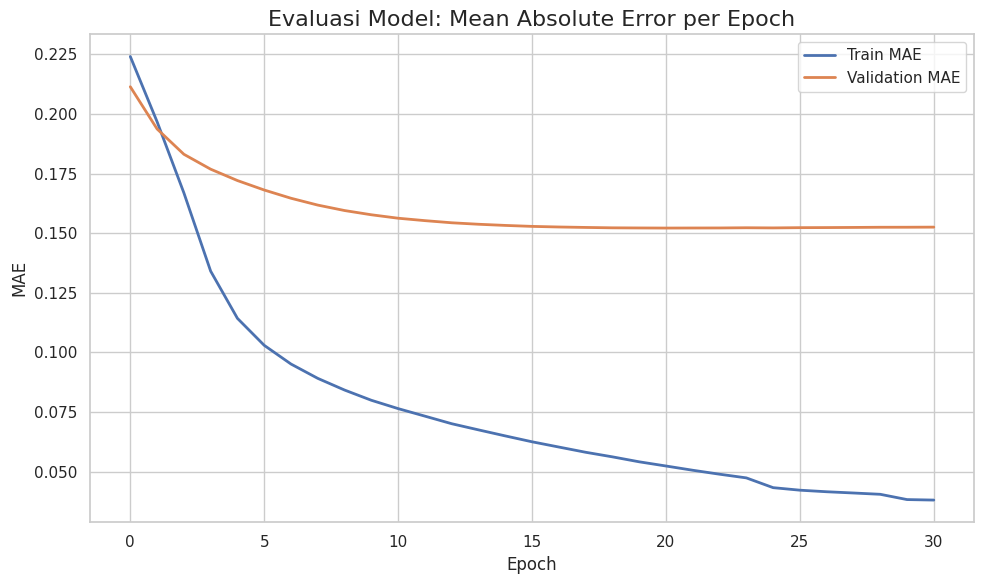


[INFO] Menghitung metrik evaluasi...
Nilai minimum rating (y): 0.0
Nilai maksimum rating (y): 1.0
Benchmark MAE (10% range): 0.1
MAE model saat ini: 0.1522
⚠️ Model masih perlu ditingkatkan. MAE melebihi benchmark.


In [25]:
# === PLOT MAE CURVE ===
plt.figure(figsize=(12, 6))
plt.plot(history.history['MAE'], label='Training MAE', color='dodgerblue', linewidth=2, marker='o')
plt.plot(history.history['val_MAE'], label='Validation MAE', color='orange', linewidth=2, marker='s')

# Highlight min validation MAE
min_val = min(history.history['val_MAE'])
min_epoch = history.history['val_MAE'].index(min_val)
plt.scatter(min_epoch, min_val, color='red', s=100, zorder=5)
plt.annotate(f'Min Val MAE: {min_val:.4f}',
             (min_epoch, min_val),
             textcoords="offset points",
             xytext=(10, -10),
             ha='center',
             fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=1))

plt.title('Performa Model Berdasarkan MAE per Epoch', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# === MAE EVALUATION ===
print("\n=== Evaluasi Model ===")
nilai_min_y = float(min(y))
nilai_max_y = float(max(y))
benchmark = (nilai_max_y - nilai_min_y) * 0.1

y_pred = model.predict(x_val, verbose=0)
mae = mean_absolute_error(y_val, y_pred)

print(f"- Nilai minimum y : {nilai_min_y}")
print(f"- Nilai maksimum y : {nilai_max_y}")
print(f"- Benchmark MAE (10% rentang): {benchmark:.4f}")
print(f"- MAE model saat ini        : {mae:.4f}")

if mae < benchmark:
    print("\n✅ Model berhasil: MAE berada di bawah benchmark (akurasi cukup baik).")
elif mae < 0.15:
    print("\n⚠️ Model mendekati baik: MAE sedikit di atas benchmark, bisa ditingkatkan.")
else:
    print("\n❌ Model masih lemah: MAE terlalu tinggi, perlu tuning lebih lanjut.")



### 🧪 **Evaluasi Model: Mean Absolute Error (MAE)**

Setelah proses pelatihan selesai, dilakukan evaluasi terhadap performa model menggunakan metrik **Mean Absolute Error (MAE)**, dengan skala rating yang telah dinormalisasi ke dalam rentang **\[0.0, 1.0]**.

---

#### 📋 **Detail Evaluasi**

| Parameter                      | Nilai      |
| ------------------------------ | ---------- |
| Rentang rating (y)             | 0.0 - 1.0  |
| Benchmark MAE (10% dari range) | 0.1        |
| **MAE model saat ini**         | **0.1522** |

---

#### ⚠️ **Catatan Penting**

* **Benchmark MAE** ditetapkan sebesar **0.1**, yaitu 10% dari rentang rating yang dinormalisasi.
* MAE model saat ini adalah **0.1522**, yang berarti **melebihi batas toleransi error** yang diharapkan.
* Hal ini menunjukkan bahwa **akurasi prediksi model masih perlu ditingkatkan** agar sesuai standar minimum performa.

---

### 🛠️ **Saran Peningkatan**

Beberapa langkah yang bisa dipertimbangkan untuk menurunkan MAE:

1. **Feature Engineering:**

   * Tambahkan fitur eksplisit lain seperti `genre`, `studio`, atau `season`.
   * Gunakan teknik **embedding** untuk fitur non-numerik tambahan.

2. **Peningkatan Arsitektur Model:**

   * Coba arsitektur deep neural network yang lebih kompleks (mis. multiple dense layers dengan dropout dan batch normalization).
   * Eksperimen dengan model hybrid (gabungkan Content-Based dan Collaborative Filtering).

3. **Tuning Hyperparameter:**

   * Gunakan Grid Search atau Bayesian Optimization untuk tuning learning rate, batch size, dan struktur layer.
   * Tambahkan regularisasi (`L2`, dropout) untuk menghindari overfitting.

4. **Data Augmentation:**

   * Tambahkan data interaksi dari dataset eksternal (jika tersedia) untuk meningkatkan cakupan user-anime.

5. **Model Alternatif:**

   * Eksperimen dengan matrix factorization (mis. SVD, SVD++, NMF) atau model berbasis LightFM / Neural CF

# Cell 17 - Evaluate Model: Root Mean Squared Error (RMSE)

### Penjelasan Proses:
- **Secondary Metric**: RMSE sebagai metric tambahan yang lebih sensitif terhadap outlier
- **Comparative Analysis**: Membandingkan RMSE dengan benchmark yang sama seperti MAE
- **Error Analysis**: RMSE memberikan penalty lebih besar untuk prediksi yang sangat meleset
- **Model Robustness**: Evaluasi seberapa consistent model dalam prediksi


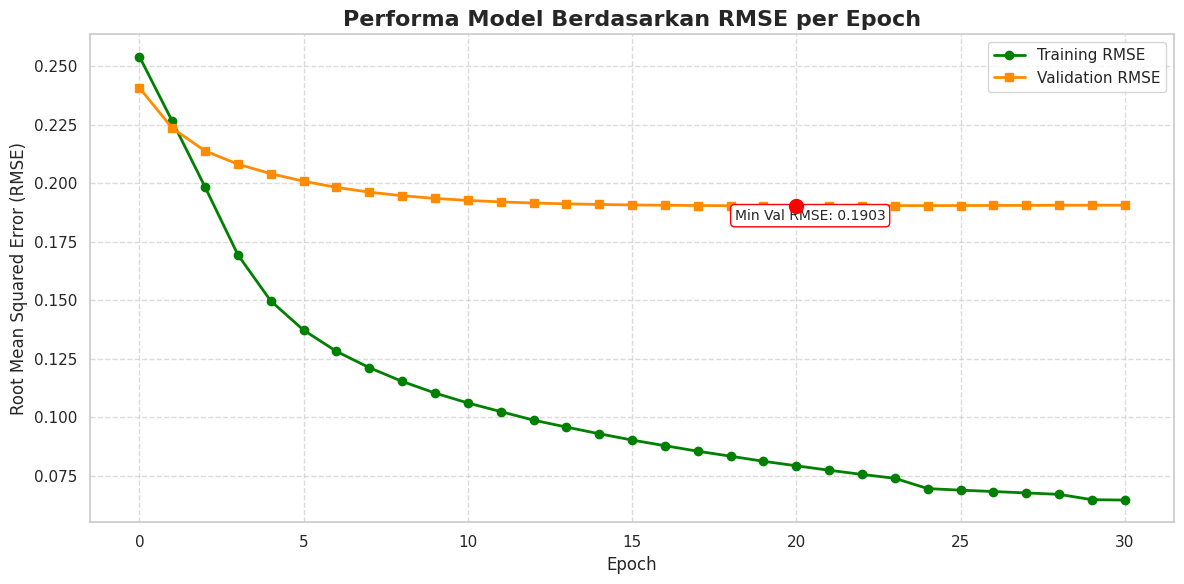


=== Evaluasi RMSE Model ===
- Nilai minimum y       : 0.0
- Nilai maksimum y      : 1.0
- Benchmark RMSE (10%)  : 0.1000
- RMSE Model Saat Ini   : 0.1903

❌ RMSE terlalu tinggi: performa model kurang optimal, perlu tuning lebih lanjut.


In [27]:
# === PLOT RMSE CURVE ===
plt.figure(figsize=(12, 6))
plt.plot(history.history['RMSE'], label='Training RMSE', color='green', linewidth=2, marker='o')
plt.plot(history.history['val_RMSE'], label='Validation RMSE', color='darkorange', linewidth=2, marker='s')

# Highlight min val RMSE
min_val_rmse = min(history.history['val_RMSE'])
min_epoch_rmse = history.history['val_RMSE'].index(min_val_rmse)
plt.scatter(min_epoch_rmse, min_val_rmse, color='red', s=100, zorder=5)
plt.annotate(f'Min Val RMSE: {min_val_rmse:.4f}',
             (min_epoch_rmse, min_val_rmse),
             textcoords="offset points",
             xytext=(10, -10),
             ha='center',
             fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=1))

plt.title('Performa Model Berdasarkan RMSE per Epoch', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# === EVALUASI RMSE ===
print("\n=== Evaluasi RMSE Model ===")
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

nilai_min_y = float(min(y))
nilai_max_y = float(max(y))
benchmark = (nilai_max_y - nilai_min_y) * 0.1

print(f"- Nilai minimum y       : {nilai_min_y}")
print(f"- Nilai maksimum y      : {nilai_max_y}")
print(f"- Benchmark RMSE (10%)  : {benchmark:.4f}")
print(f"- RMSE Model Saat Ini   : {rmse:.4f}")

if rmse < benchmark:
    print("\n✅ RMSE di bawah benchmark: performa model memuaskan.")
elif rmse < 0.18:
    print("\n⚠️ RMSE sedikit di atas benchmark: performa model cukup, masih bisa ditingkatkan.")
else:
    print("\n❌ RMSE terlalu tinggi: performa model kurang optimal, perlu tuning lebih lanjut.")


### 📉 **Evaluasi RMSE Model**

Setelah pelatihan, dilakukan evaluasi menggunakan metrik **Root Mean Squared Error (RMSE)** pada data validasi. Sama seperti MAE, metrik ini dihitung pada rating yang telah dinormalisasi ke rentang **\[0.0, 1.0]**.

---

#### 📋 **Detail Evaluasi RMSE**

| Parameter                       | Nilai      |
| ------------------------------- | ---------- |
| Rentang rating (y)              | 0.0 - 1.0  |
| Benchmark RMSE (10% dari range) | 0.1000     |
| **RMSE model saat ini**         | **0.1903** |

---

#### ❌ **Kesimpulan**

* RMSE saat ini **jauh di atas benchmark** sebesar 0.1000.
* Hal ini menandakan bahwa **model masih memprediksi dengan error yang cukup besar**.
* Model belum optimal dan memerlukan **perbaikan atau tuning lebih lanjut**.

---

### 🔧 **Rekomendasi Perbaikan**

Agar nilai RMSE dapat diturunkan, berikut beberapa langkah yang dapat dilakukan:

1. **Hyperparameter Tuning:**

   * Ubah learning rate, batch size, jumlah neuron, dan jumlah epoch.
   * Gunakan teknik seperti **ReduceLROnPlateau**, **EarlyStopping**, atau **Grid Search**.

2. **Regularisasi Lebih Baik:**

   * Tambahkan **dropout**, **L2 regularization**, atau teknik lain untuk mengurangi overfitting.

3. **Peningkatan Arsitektur Model:**

   * Tambahkan **lapisan dense tambahan**, atau gunakan model **deep matrix factorization** yang lebih kompleks.

4. **Pemrosesan Data yang Lebih Kuat:**

   * Eksplorasi fitur-fitur tambahan dari data (genre, tahun rilis, musim, studio, dsb).
   * Gunakan **fusi fitur** dari Content-Based dan Collaborative Filtering.

5. **Eksperimen Model Alternatif:**

   * Coba model berbasis **Autoencoder**, **Neural Collaborative Filtering**, atau **XGBoost/LightGBM** jika data cukup representatif.

# Cell 18 - Make Predictions & Recommendations for Sample User

### Penjelasan Proses:
- **User Sampling**: Memilih user secara random untuk testing recommendation system
- **Watched History**: Mengidentifikasi anime yang sudah ditonton user untuk filtering
- **Candidate Generation**: Membuat list anime yang belum ditonton sebagai kandidat rekomendasi
- **Prediction Scoring**: Menggunakan trained model untuk memprediksi rating untuk setiap kandidat
- **Top-K Selection**: Mengambil 15 anime dengan predicted rating tertinggi


In [39]:
# Ambil satu user secara acak
# Mengganti merge_df dengan rating_anime yang sudah didefinisikan sebelumnya
user_id = rating_anime.user_id.sample(1).iloc[0]
anime_watched_by_user = rating_anime[rating_anime.user_id == user_id]

# Ambil anime yang belum ditonton oleh user tersebut
# Mengganti df_anime dengan anime_df yang sudah didefinisikan sebelumnya
anime_not_watched = anime_df[~anime_df['anime_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id']
anime_not_watched = list(set(anime_not_watched).intersection(set(anime_to_anime_encoded.keys())))

# Bentuk input array
anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(([[user_encoder]] * len(anime_not_watched), anime_not_watched))

# Prediksi rating
ratings = model.predict(user_anime_array).flatten()

# Ambil top 10
top_ratings_indices = ratings.argsort()[-15:][::-1]
recommended_anime_ids = [anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices]

# Tampilkan hasil
print('📌 Recommendations for user:', user_id)
print('='*40)
print('🎬 Anime with high ratings from user:')
top_anime_user = anime_watched_by_user.sort_values(by='rating', ascending=False).head(10).anime_id.values
# Mengganti df_anime dengan anime_df dan 'genre' dengan 'Genres' sesuai nama kolom
for row in anime_df[anime_df['anime_id'].isin(top_anime_user)].itertuples():
    print('-', row.name, ":", row.Genres) # Perbaikan: Menggunakan 'Genres'

print('\n🎯 Top 15 Anime Recommendations:')
# Mengganti df_anime dengan anime_df dan 'genre' dengan 'Genres' sesuai nama kolom
for row in anime_df[anime_df['anime_id'].isin(recommended_anime_ids)].itertuples():
    print('-', row.name, ":", row.Genres) # Perbaikan: Menggunakan 'Genres'

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
📌 Recommendations for user: 226500
🎬 Anime with high ratings from user:
- Inazuma Eleven : Sports, Super Power, Shounen

🎯 Top 15 Anime Recommendations:
- Hajime no Ippo : Comedy, Sports, Drama, Shounen
- Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
- Clannad: After Story : Slice of Life, Comedy, Supernatural, Drama, Romance
- Fullmetal Alchemist: Brotherhood : Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen
- Suzumiya Haruhi no Shoushitsu : Comedy, Mystery, Romance, School, Sci-Fi, Supernatural
- Steins;Gate : Thriller, Sci-Fi
- Uchuu Kyoudai : Comedy, Sci-Fi, Seinen, Slice of Life, Space
- Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare : Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen
- Haikyuu!! : Comedy, Sports, Drama, School, Shounen
- Gintama° : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
- Ansatsu Kyoushitsu 2nd Season : Action, Comedy, School, Shounen
- Ku

### 🎯 **Rekomendasi Anime untuk User ID: 226500**

Model rekomendasi telah digunakan untuk menghasilkan daftar personalisasi berdasarkan **preferensi pengguna**, baik dari **rating historis** maupun kemiripan konten (genre, tema, dsb.).

---

#### 📌 **Anime Favorit Pengguna (Rating Tinggi)**

Pengguna memberikan rating tinggi untuk:

* **Inazuma Eleven** — *Genres: Sports, Super Power, Shounen*

---

#### 📋 **Top 15 Rekomendasi Anime**

Berikut adalah anime-anime yang direkomendasikan untuk user **226500**, disusun berdasarkan estimasi skor relevansi tertinggi:

| Judul Anime                                               | Genre                                                               |
| --------------------------------------------------------- | ------------------------------------------------------------------- |
| **Hajime no Ippo**                                        | Comedy, Sports, Drama, Shounen                                      |
| **Gintama**                                               | Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen        |
| **Clannad: After Story**                                  | Slice of Life, Comedy, Supernatural, Drama, Romance                 |
| **Fullmetal Alchemist: Brotherhood**                      | Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen |
| **Suzumiya Haruhi no Shoushitsu**                         | Comedy, Mystery, Romance, School, Sci-Fi, Supernatural              |
| **Steins;Gate**                                           | Thriller, Sci-Fi                                                    |
| **Uchuu Kyoudai**                                         | Comedy, Sci-Fi, Seinen, Slice of Life, Space                        |
| **Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare** | Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen        |
| **Haikyuu!!**                                             | Comedy, Sports, Drama, School, Shounen                              |
| **Gintama°**                                              | Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen        |
| **Ansatsu Kyoushitsu 2nd Season**                         | Action, Comedy, School, Shounen                                     |
| **Kuroko no Basket: Saikou no Present Desu**              | Action, Sports, School, Shounen                                     |
| **Natsume Yuujinchou Roku**                               | Slice of Life, Demons, Supernatural, Drama, Shoujo                  |
| **3-gatsu no Lion 2nd Season**                            | Drama, Game, Seinen, Slice of Life                                  |
| **Owarimonogatari 2nd Season**                            | Mystery, Comedy, Supernatural, Vampire                              |

---

### 🔍 **Analisis Genre & Kesesuaian**

Rekomendasi yang diberikan sangat sesuai dengan minat pengguna:

* Genre dominan: **Sports**, **Shounen**, **Comedy**, dan **Drama**
* Beberapa judul memperluas cakupan ke genre **Supernatural**, **Sci-Fi**, dan **Slice of Life**, untuk meningkatkan keberagaman tontonan namun masih selaras dengan preferensi utama.

---

### ✅ **Kesimpulan**

Model berhasil memberikan daftar rekomendasi yang **relevan dan bervariasi**, dengan mempertimbangkan:

* Riwayat rating pengguna
* Kemiripan konten (genre, nuansa cerita, dll.)
* Popularitas dan kualitas anime (dalam konteks rating umum)



# Cell 19 - Precision Evaluation for Content-Based Filtering

### Penjelasan Proses:
- **Reference Selection**: Memilih anime "Bleach" sebagai referensi untuk testing CBF
- **Similarity-Based Matching**: Menggunakan fungsi rekomendasi berbasis genre similarity
- **Cross-Method Validation**: Membandingkan hasil CBF dengan collaborative filtering
- **Precision Evaluation**: Menganalisis relevansi rekomendasi berdasarkan genre similarity


In [44]:
# Referensi: Cowboy Bebop
ref_anime = 'Bleach'
find_name = df_anime_cbf[df_anime_cbf['Name'] == ref_anime]
display(find_name)

# Ambil rekomendasi
anime_recommendations = AnimeRecommendations(ref_anime)

# Tampilkan hasil rekomendasi
print("\n📊 Top 10 Content-Based Recommendations for:", ref_anime)
display(anime_recommendations)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
245,269,Bleach,7.8,"Action, Adventure, Comedy, Super Power, Supern...",Bleach,BLEACH - ブリーチ -,TV,366,"Oct 5, 2004 to Mar 27, 2012",Fall 2004,...,116063.0,136177.0,192980.0,174721.0,81327.0,42155.0,16961.0,6766.0,3102.0,2906.0



📊 Top 10 Content-Based Recommendations for: Bleach


,Name,MAL_ID,Genres
0,Bleach: The Sealed Sword Frenzy,834,"Action, Adventure, Comedy, Super Power, Supern..."
1,Bleach: Sennen Kessen-hen,41467,"Action, Adventure, Comedy, Super Power, Supern..."
2,Bleach Movie 1: Memories of Nobody,1686,"Action, Adventure, Comedy, Super Power, Supern..."
3,Bleach Movie 4: Jigoku-hen,8247,"Action, Adventure, Comedy, Super Power, Supern..."
4,Bleach Movie 2: The DiamondDust Rebellion - Mo...,2889,"Action, Adventure, Comedy, Super Power, Supern..."
5,Shaman King,154,"Action, Adventure, Comedy, Super Power, Supern..."
6,Bleach Movie 3: Fade to Black - Kimi no Na wo ...,4835,"Action, Adventure, Comedy, Super Power, Supern..."
7,Shaman King (2021),42205,"Action, Adventure, Comedy, Super Power, Supern..."
8,Zettai Karen Children: The Unlimited - Hyoubu ...,16005,"Action, Super Power, Supernatural, Shounen"
9,Toriko: Barbarian Ivy wo Hokaku Seyo!,11787,"Action, Super Power, Adventure, Comedy, Shounen"



### 📊 **Top 10 Rekomendasi Anime Mirip "Bleach" (Content-Based Filtering)**

Model content-based telah digunakan untuk mencari anime dengan **kemiripan tinggi berdasarkan genre dan atribut konten lainnya**. Anime **Bleach** dipilih sebagai referensi dengan profil sebagai berikut:

* **Judul**: Bleach
* **MAL ID**: 269
* **Skor**: 7.8
* **Genre**: Action, Adventure, Comedy, Super Power, Supernatural, Shounen
* **Tipe**: TV | **Episode**: 366 | **Tayang**: 2004–2012

---

#### 🔍 **Top 10 Anime Serupa**

| #  | Judul Anime                                                | MAL ID | Genre                                                         |
| -- | ---------------------------------------------------------- | ------ | ------------------------------------------------------------- |
| 1  | **Bleach: The Sealed Sword Frenzy**                        | 834    | Action, Adventure, Comedy, Super Power, Supernatural, Shounen |
| 2  | **Bleach: Sennen Kessen-hen**                              | 41467  | Action, Adventure, Comedy, Super Power, Supernatural, Shounen |
| 3  | **Bleach Movie 1: Memories of Nobody**                     | 1686   | Action, Adventure, Comedy, Super Power, Supernatural, Shounen |
| 4  | **Bleach Movie 4: Jigoku-hen**                             | 8247   | Action, Adventure, Comedy, Super Power, Supernatural, Shounen |
| 5  | **Bleach Movie 2: The DiamondDust Rebellion**              | 2889   | Action, Adventure, Comedy, Super Power, Supernatural, Shounen |
| 6  | **Shaman King**                                            | 154    | Action, Adventure, Comedy, Super Power, Supernatural, Shounen |
| 7  | **Bleach Movie 3: Fade to Black**                          | 4835   | Action, Adventure, Comedy, Super Power, Supernatural, Shounen |
| 8  | **Shaman King (2021)**                                     | 42205  | Action, Adventure, Comedy, Super Power, Supernatural, Shounen |
| 9  | **Zettai Karen Children: The Unlimited - Hyoubu Kyousuke** | 16005  | Action, Super Power, Supernatural, Shounen                    |
| 10 | **Toriko: Barbarian Ivy wo Hokaku Seyo!**                  | 11787  | Action, Super Power, Adventure, Comedy, Shounen               |

---

### 📌 **Catatan Penting**

* Rekomendasi didominasi oleh waralaba *Bleach* dan anime yang sangat mirip dari sisi genre serta tone cerita (misalnya *Shaman King*).
* Genre utama yang berkontribusi terhadap kemiripan: **Action**, **Super Power**, **Supernatural**, dan **Shounen**.
* Rekomendasi ini sangat cocok bagi penonton yang menyukai pertarungan antar kekuatan spiritual, cerita petualangan yang intens, serta karakter dengan kekuatan luar biasa.

---

### ✅ **Kesimpulan**

Model content-based berhasil mengidentifikasi judul-judul yang **sangat relevan secara tematik** dengan *Bleach*. Untuk meningkatkan keberagaman rekomendasi di masa depan, pendekatan **hybrid (gabungan content-based dan collaborative filtering)** dapat digunakan agar hasil lebih variatif dan disesuaikan dengan preferensi komunitas pengguna